In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
#loading data

digits = datasets.load_digits()

#looking at the shape of our images

print(digits.images.shape)

x=digits.data   #data that will be used in what follows

y=digits.target #these are the labels of our data

(1797, 8, 8)


## Unsupervised learning

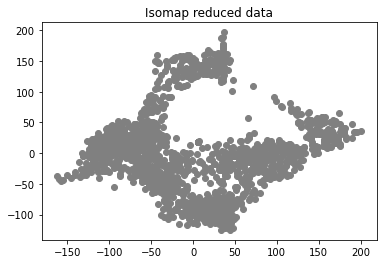

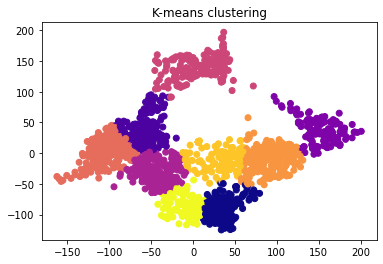

In [3]:
#Using Isomap to find if our data live in a lower dimensional space

embedding = Isomap(n_components=2)

#transforming our data in the new space and printing their shape

X_reduced= embedding.fit_transform(x)
X_reduced.shape

#plotting the data in the new space
#this image says nothing about the data and their labels up to now

plt.scatter(X_reduced[:,0], X_reduced[:,1],c='grey')
plt.title('Isomap reduced data')
plt.show()


#Trying clustering on the data using k-means

k_means = KMeans(n_clusters=9)

#fitting and predicting 

k_means.fit(X_reduced)
y_pred = k_means.predict(X_reduced)

#plotting the clustered data

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='plasma');
plt.title('K-means clustering')
plt.show()


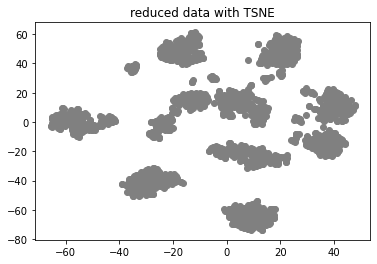

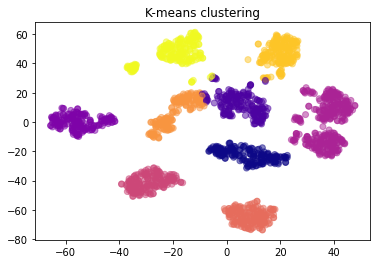

In [4]:
#Let's try another algorithm to reduce dimensionality

#fitting and transforming

tsne=TSNE(n_components=2,learning_rate=200)
X_TSNE=tsne.fit_transform(x)

#plotting

plt.scatter(X_TSNE[:,0], X_TSNE[:,1],c='grey')
plt.title('reduced data with TSNE')
plt.show()

#fitting and predicting

k_means = KMeans(n_clusters=9)
k_means.fit(X_TSNE)
y_pred = k_means.predict(X_TSNE)

#plotting the clustered data

plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1],alpha=0.5, c=y_pred, cmap='plasma');
plt.title('K-means clustering')
plt.show()

## Supervised learning

In [5]:
#Dividing our dataset in a train and test sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
#Defining the classification algorithm that will be used

clf = LogisticRegression(solver='sag')

#fitting the train set

clf.fit(X_train[:], y_train)

#predicting labels of the train set

y_pred_train=clf.predict(X_train[:])

#predicting the labels of the test set

y_pred_test=clf.predict(X_test[:])

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [7]:
# printing the accuracy score of our fit on the test and train sets
# this is the fraction of labels correctly identified

print('accuracy score on the train set: \n \n',accuracy_score(y_train, y_pred_train),'\n')
print('accuracy score on the test set: \n \n',accuracy_score(y_test, y_pred_test),'\n')

# printing the confusion matrix

print('confusion matrix for the test set: \n \n',confusion_matrix(y_test, y_pred_test))

accuracy score on the train set: 
 
 1.0 

accuracy score on the test set: 
 
 0.9638888888888889 

confusion matrix for the test set: 
 
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 35  1  0  0  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  1  0  1]
 [ 0  0  0  0 42  0  0  1  0  0]
 [ 0  1  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 41  0  2]
 [ 0  1  0  0  0  1  0  0 31  0]
 [ 0  0  0  0  0  1  0  0  1 27]]


From the accuracy scores above we see that all the labels of the train set are correctly fitted as expected while on the test set we have an accuracy of nearly 94%. Looking at the confusion matrix we see that the most difficult digits to identify are 2,8,9